<a href="https://colab.research.google.com/github/vivekananthan28/Weather-Prediction/blob/main/weather_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Panda Library and Load the weather dataset

In [ ]:
import pandas as pd

#Load Weather Dataset File
weather = pd.read_csv("Bangalore.csv", index_col = "DATE")

#Displaying the Dataset

In [ ]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1980-01-01,IN009010100,"BANGALORE, IN",0.0,68,86.0,57.0
1980-01-02,IN009010100,"BANGALORE, IN",NaN,70,82.0,NaN
1980-01-03,IN009010100,"BANGALORE, IN",0.0,71,82.0,59.0
1980-01-04,IN009010100,"BANGALORE, IN",0.0,69,82.0,59.0
1980-01-05,IN009010100,"BANGALORE, IN",0.0,69,81.0,59.0
...,...,...,...,...,...,...
2023-11-13,IN009010100,"BANGALORE, IN",NaN,72,83.0,63.0
2023-11-14,IN009010100,"BANGALORE, IN",NaN,70,83.0,65.0
2023-11-15,IN009010100,"BANGALORE, IN",0.0,74,NaN,67.0


# Calculate the percentage of missing values

In [ ]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [ ]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.359781
TAVG       0.000000
TMAX       0.101365
TMIN       0.174731
dtype: float64

# Select columns with less than 4% missing values

In [ ]:
valid_columns = weather.columns[null_pct < .04]
valid_columns

Index(['STATION', 'NAME', 'TAVG'], dtype='object')

# Filter the dataset to include only valid columns

In [ ]:
weather = weather[valid_columns].copy()

# Convert column names to lowercase


In [ ]:
weather.columns = weather.columns.str.lower()
weather

,station,name,tavg
DATE,,,
1980-01-01,IN009010100,"BANGALORE, IN",68
1980-01-02,IN009010100,"BANGALORE, IN",70
1980-01-03,IN009010100,"BANGALORE, IN",71
1980-01-04,IN009010100,"BANGALORE, IN",69
1980-01-05,IN009010100,"BANGALORE, IN",69
...,...,...,...
2023-11-13,IN009010100,"BANGALORE, IN",72
2023-11-14,IN009010100,"BANGALORE, IN",70
2023-11-15,IN009010100,"BANGALORE, IN",74


# Forward fill to impute missing values

In [ ]:
weather = weather.ffill()

In [ ]:
weather.apply(pd.isnull).sum()

station    0
name       0
tavg       0
dtype: int64

In [ ]:
weather.dtypes

station    object
name       object
tavg        int64
dtype: object

In [ ]:
weather.index

Index(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04', '1980-01-05',
       '1980-01-06', '1980-01-07', '1980-01-08', '1980-01-09', '1980-01-10',
       ...
       '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11', '2023-11-12',
       '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17'],
      dtype='object', name='DATE', length=15893)

In [ ]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11',
               '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15',
               '2023-11-16', '2023-11-17'],
              dtype='datetime64[ns]', name='DATE', length=15893, freq=None)

In [ ]:
weather.index.year.value_counts().sort_index()

1980    364
1981    364
1982    353
1983    358
1984    362
1985    360
1986    362
1987    360
1988    359
1989    357
1990    351
1991    360
1992    352
1993    361
1994    362
1995    360
1996    360
1997    360
1998    364
1999    361
2000    365
2001    365
2002    363
2003    363
2004    366
2005    365
2006    365
2007    362
2008    366
2009    364
2010    365
2011    360
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    361
2022    364
2023    321
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

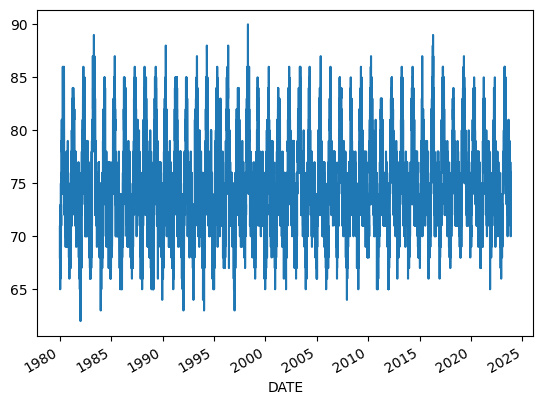

In [ ]:
weather["tavg"].plot()

In [ ]:
weather

,station,name,tavg
DATE,,,
1980-01-01,IN009010100,"BANGALORE, IN",68
1980-01-02,IN009010100,"BANGALORE, IN",70
1980-01-03,IN009010100,"BANGALORE, IN",71
1980-01-04,IN009010100,"BANGALORE, IN",69
1980-01-05,IN009010100,"BANGALORE, IN",69
...,...,...,...
2023-11-13,IN009010100,"BANGALORE, IN",72
2023-11-14,IN009010100,"BANGALORE, IN",70
2023-11-15,IN009010100,"BANGALORE, IN",74


In [ ]:
weather["target"]=weather.shift (-1)["tavg"]
weather

,station,name,tavg,target
DATE,,,,
1980-01-01,IN009010100,"BANGALORE, IN",68,70.0
1980-01-02,IN009010100,"BANGALORE, IN",70,71.0
1980-01-03,IN009010100,"BANGALORE, IN",71,69.0
1980-01-04,IN009010100,"BANGALORE, IN",69,69.0
1980-01-05,IN009010100,"BANGALORE, IN",69,66.0
...,...,...,...,...
2023-11-13,IN009010100,"BANGALORE, IN",72,70.0
2023-11-14,IN009010100,"BANGALORE, IN",70,74.0
2023-11-15,IN009010100,"BANGALORE, IN",74,76.0


In [ ]:
weather = weather.ffill()
weather

,station,name,tavg,target
DATE,,,,
1980-01-01,IN009010100,"BANGALORE, IN",68,70.0
1980-01-02,IN009010100,"BANGALORE, IN",70,71.0
1980-01-03,IN009010100,"BANGALORE, IN",71,69.0
1980-01-04,IN009010100,"BANGALORE, IN",69,69.0
1980-01-05,IN009010100,"BANGALORE, IN",69,66.0
...,...,...,...,...
2023-11-13,IN009010100,"BANGALORE, IN",72,70.0
2023-11-14,IN009010100,"BANGALORE, IN",70,74.0
2023-11-15,IN009010100,"BANGALORE, IN",74,76.0


# Initialize Ridge Regression with alpha = 0.1

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

# Select predictors excluding target, name, and station columns

In [ ]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['tavg'], dtype='object')

In [ ]:
def backtest(weather,model,predictors,start=3650,step=90):
  all_predictors=[]
  for i in range(start,weather.shape[0],step):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step),:]

     # Fit the model on training data
    model.fit(train[predictors], train["target"])

    # Make predictions on the test data
    preds = model.predict(test[predictors])

    # Create a DataFrame to compare actual and predicted values
    preds = pd.Series(preds, index=test.index)
    combined = pd.concat([test["target"],preds], axis=1)

    combined.columns = ["actual","prediction"]

    # Calculate the absolute difference between actual and predicted values
    combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
    all_predictors.append(combined)
  return pd.concat(all_predictors, axis=0)



# Perform backtesting

In [ ]:
predictions = backtest(weather, rr, predictors)

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
1990-02-21,76.0,74.946603,1.053397
1990-02-22,79.0,75.829016,3.170984
1990-02-23,78.0,78.476255,0.476255
1990-02-24,77.0,77.593842,0.593842
1990-02-25,77.0,76.711429,0.288571
...,...,...,...
2023-11-13,70.0,72.289946,2.289946
2023-11-14,74.0,70.492527,3.507473
2023-11-15,76.0,74.087870,1.912130


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"],predictions["prediction"])

1.3711067497435663

In [ ]:
predictions["diff"].mean()

1.3711067497435663

#Rolling Averages Function

In [ ]:
def pct_diff(old, new):
  return (new-old)/old

def compute_rolling(weather, horizon, col):
  label = f"rolling_{horizon}_{col}"

  # Calculate rolling mean and percentage difference
  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
  return weather

# Define rolling horizons
rolling_horizons = [3,14]

# Apply rolling averages for the 'tavg' column
for horizon in rolling_horizons:
  for col in ["tavg"]:
    weather = compute_rolling(weather, horizon, col)

In [ ]:
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct
DATE,,,,,,,,
1980-01-01,IN009010100,"BANGALORE, IN",68,70.0,NaN,NaN,NaN,NaN
1980-01-02,IN009010100,"BANGALORE, IN",70,71.0,NaN,NaN,NaN,NaN
1980-01-03,IN009010100,"BANGALORE, IN",71,69.0,69.666667,0.019139,NaN,NaN
1980-01-04,IN009010100,"BANGALORE, IN",69,69.0,70.000000,-0.014286,NaN,NaN
1980-01-05,IN009010100,"BANGALORE, IN",69,66.0,69.666667,-0.009569,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-11-13,IN009010100,"BANGALORE, IN",72,70.0,73.000000,-0.013699,74.071429,-0.027965
2023-11-14,IN009010100,"BANGALORE, IN",70,74.0,71.666667,-0.023256,73.785714,-0.051307
2023-11-15,IN009010100,"BANGALORE, IN",74,76.0,72.000000,0.027778,73.714286,0.003876


# Remove rows with NaN values introduced by rolling averages

In [ ]:
weather = weather.iloc[14:,:]

In [ ]:
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct
DATE,,,,,,,,
1980-01-15,IN009010100,"BANGALORE, IN",67,67.0,67.333333,-0.004950,68.071429,-0.015740
1980-01-16,IN009010100,"BANGALORE, IN",67,67.0,67.000000,0.000000,67.857143,-0.012632
1980-01-17,IN009010100,"BANGALORE, IN",67,68.0,67.000000,0.000000,67.571429,-0.008457
1980-01-18,IN009010100,"BANGALORE, IN",68,71.0,67.333333,0.009901,67.500000,0.007407
1980-01-19,IN009010100,"BANGALORE, IN",71,66.0,68.666667,0.033981,67.642857,0.049630
...,...,...,...,...,...,...,...,...
2023-11-13,IN009010100,"BANGALORE, IN",72,70.0,73.000000,-0.013699,74.071429,-0.027965
2023-11-14,IN009010100,"BANGALORE, IN",70,74.0,71.666667,-0.023256,73.785714,-0.051307
2023-11-15,IN009010100,"BANGALORE, IN",74,76.0,72.000000,0.027778,73.714286,0.003876


# Fill remaining NaN values with 0


In [ ]:
weather = weather.fillna(0)

#Expanding Means Function

In [ ]:
def expand_mean(df):
  return df.expanding(1).mean()

# Apply expanding means for the 'tavg' column
for col in ["tavg"]:
  weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
  weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [ ]:
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,
1980-01-15,IN009010100,"BANGALORE, IN",67,67.0,67.333333,-0.004950,68.071429,-0.015740,67.000000,67.000000
1980-01-16,IN009010100,"BANGALORE, IN",67,67.0,67.000000,0.000000,67.857143,-0.012632,67.000000,67.000000
1980-01-17,IN009010100,"BANGALORE, IN",67,68.0,67.000000,0.000000,67.571429,-0.008457,67.000000,67.000000
1980-01-18,IN009010100,"BANGALORE, IN",68,71.0,67.333333,0.009901,67.500000,0.007407,67.250000,68.000000
1980-01-19,IN009010100,"BANGALORE, IN",71,66.0,68.666667,0.033981,67.642857,0.049630,68.000000,71.000000
...,...,...,...,...,...,...,...,...,...,...
2023-11-13,IN009010100,"BANGALORE, IN",72,70.0,73.000000,-0.013699,74.071429,-0.027965,71.650929,71.863636
2023-11-14,IN009010100,"BANGALORE, IN",70,74.0,71.666667,-0.023256,73.785714,-0.051307,71.649652,71.659091
2023-11-15,IN009010100,"BANGALORE, IN",74,76.0,72.000000,0.027778,73.714286,0.003876,71.651468,71.395349


In [ ]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['tavg', 'rolling_3_tavg', 'rolling_3_tavg_pct', 'rolling_14_tavg',
       'rolling_14_tavg_pct', 'month_avg_tavg', 'day_avg_tavg'],
      dtype='object')

# Perform backtesting on the modified dataset

In [ ]:
predictions = backtest(weather, rr, predictors)

# Evaluate Mean Absolute Error

In [ ]:
mean_absolute_error(predictions["actual"],predictions["prediction"])

1.2939585410410324

# Analyze top differences in predictions

In [ ]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
DATE,,,
1999-04-21,71.0,82.717068,11.717068
1995-08-16,83.0,72.398891,10.601109
2010-03-30,73.0,81.510185,8.510185
2004-05-02,73.0,81.451081,8.451081
1991-05-11,85.0,76.967882,8.032118
...,...,...,...
1993-04-01,78.0,77.999307,0.000693
2015-03-09,77.0,76.999351,0.000649
2019-12-28,71.0,71.000503,0.000503


# Display a specific date range and the corresponding differences

In [ ]:
weather.loc["2000-11-01":"2000-11-15"]

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,
2000-11-01,IN009010100,"BANGALORE, IN",73,74.0,72.666667,0.004587,72.571429,0.005906,71.269492,72.000000
2000-11-02,IN009010100,"BANGALORE, IN",74,74.0,73.666667,0.004525,72.571429,0.019685,71.274112,71.904762
2000-11-03,IN009010100,"BANGALORE, IN",74,74.0,73.666667,0.004525,72.642857,0.018682,71.278716,72.380952
2000-11-04,IN009010100,"BANGALORE, IN",74,74.0,74.000000,0.000000,72.785714,0.016683,71.283305,72.250000
2000-11-05,IN009010100,"BANGALORE, IN",74,75.0,74.000000,0.000000,73.000000,0.013699,71.287879,71.526316
2000-11-06,IN009010100,"BANGALORE, IN",75,73.0,74.333333,0.008969,73.285714,0.023392,71.294118,72.650000
2000-11-07,IN009010100,"BANGALORE, IN",73,72.0,74.000000,-0.013514,73.357143,-0.004869,71.296980,71.904762
2000-11-08,IN009010100,"BANGALORE, IN",72,72.0,73.333333,-0.018182,73.357143,-0.018500,71.298157,72.095238
2000-11-09,IN009010100,"BANGALORE, IN",72,72.0,72.333333,-0.004608,73.285714,-0.017544,71.299331,71.850000


# Visualize the distribution of prediction differences

<Axes: >

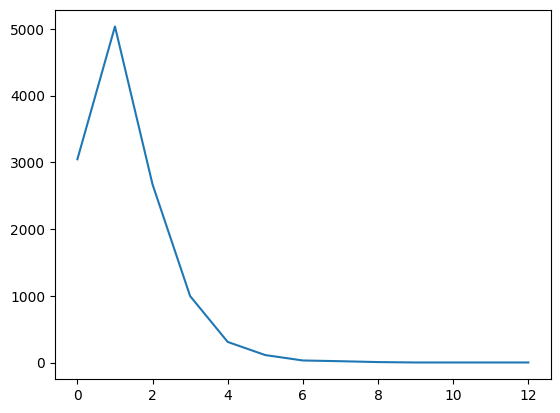

In [ ]:
predictions["diff"].round().value_counts().sort_index().plot()

#Predicted Result for Weather using the given dataset

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
1990-03-07,79.0,79.521403,0.521403
1990-03-08,79.0,79.141659,0.141659
1990-03-09,71.0,78.959057,7.959057
1990-03-10,74.0,75.114156,1.114156
1990-03-11,78.0,75.882110,2.117890
...,...,...,...
2023-11-13,70.0,72.339134,2.339134
2023-11-14,74.0,71.056186,2.943814
2023-11-15,76.0,73.135962,2.864038
